# <center> Hotel booking demand
<center> From the paper: hotel booking demand datasets

# `About Dataset`

## Context
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

## Content
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

## Acknowledgements
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

## Inspiration
This data set is ideal for anyone looking to practice their exploratory data analysis (EDA) or get started in building predictive models!

If you're looking for inspiration on data visualizations, check out the #TidyTuesday program, a free, weekly online event that encourages participants to create and share their code and visualizations for a given data set on Twitter.

If you'd like to dive into predictive modeling, Julia Silge has an accessible and fantastic walk-through which highlights the tidymodels R package.

# Imports

In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [64]:
hb_df = pd.read_csv("hotel_bookings.csv")
hb_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## `Data Preprocessing` 

In [65]:
# Get information about the dataset.
hb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [66]:
#check for null values.
hb_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There is an existing null values on 3 columns that needs cure.

## `Calculate the percentage of missing values`

In [67]:
#check percentage for agent.
agent_nan_percentage = hb_df.agent.isna().sum()/len(hb_df)*100
"{} % of values in agent columns are missing".format(round(agent_nan_percentage, 2))

'13.69 % of values in agent columns are missing'

In [68]:
#check percentage for company.
company_nan_percentage = hb_df.company.isna().sum()/len(hb_df)*100
"{} % of values in company columns are missing".format(round(company_nan_percentage, 2))

'94.31 % of values in company columns are missing'

This indicates that majority values of company is missing. Best approach for this one is to remove from the dataset. Country also need to drop.

In [69]:
hb_df.drop(['country','company'], axis = 1, inplace = True)

## `Data Imputation`

In [71]:
#Fill each attributes with nan values with their mean values
df = hb_df.fillna(hb_df.mean())

In [73]:
#check for duplicated data
df.loc[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
117,Resort Hotel,0,92,2015,July,27,4,4,6,2,...,0,No Deposit,40.0,0,Contract,71.55,0,1,Check-Out,2015-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [74]:
#check for duplicated charges
df.loc[df.duplicated(subset = ['arrival_date_year'])].head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [75]:
#check for example duplicate.
df.query('lead_time == 14 & agent == 240.0 & adr == 98.0')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [76]:
#copy a new data with no duplicates
results_df = df.loc[~df.duplicated(subset = ['adr'])].reset_index(drop = True).copy()

In [77]:
results_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000,8879.000000
mean,0.318392,97.071067,2016.042347,29.806960,16.635432,1.660209,4.164546,2.004618,0.282926,0.015092,0.012051,0.010024,0.030521,0.336187,144.134036,0.250479,126.916054,0.117356,0.769681
std,0.465879,84.967666,0.714954,12.233448,9.173252,1.189040,2.613338,0.473541,0.626377,0.124666,0.109119,0.170507,0.340072,0.785189,114.888609,5.337990,86.631642,0.322561,0.849579
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,29.000000,2016.000000,22.000000,9.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,76.370000,0.000000,0.000000
50%,0.000000,73.000000,2016.000000,31.000000,17.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.000000,0.000000,113.690000,0.000000,1.000000
75%,1.000000,151.000000,2017.000000,38.000000,25.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,0.000000,165.345000,0.000000,1.000000
max,1.000000,542.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,10.000000,2.000000,1.000000,13.000000,14.000000,16.000000,531.000000,178.000000,5400.000000,2.000000,5.000000


## `Feature Understanding` 

Text(0, 0.5, 'hotel type')

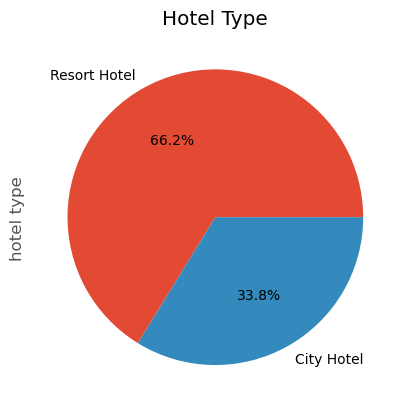

In [128]:
ax = results_df["hotel"].value_counts().head(10).plot(kind = "pie", title ="Hotel Type", autopct='%1.1f%%')
ax.set_ylabel('hotel type')

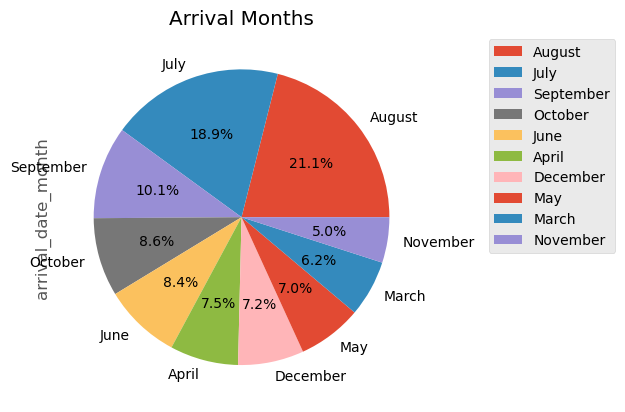

In [103]:
ax = results_df["arrival_date_month"].value_counts().head(10).plot(kind = "pie", title ="Arrival Months", autopct='%1.1f%%')
ax.legend(loc='upper left', bbox_to_anchor=(1.15, 1))

Text(0, 0.5, 'arrival year')

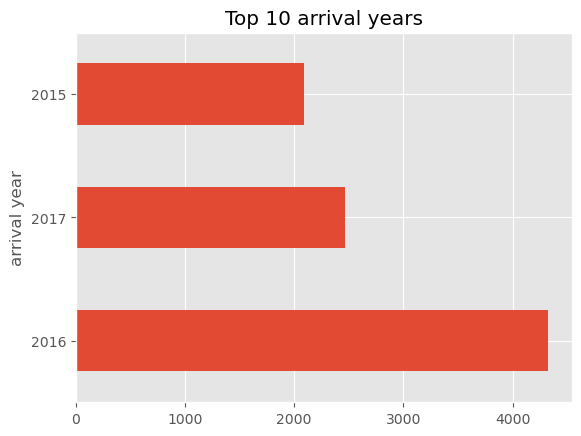

In [86]:
ax = results_df["arrival_date_year"].value_counts().head(10).plot(kind = "barh", title ="Top 10 arrival years")
ax.set_ylabel('arrival year')

## `Relationship Features` 

<Axes: >

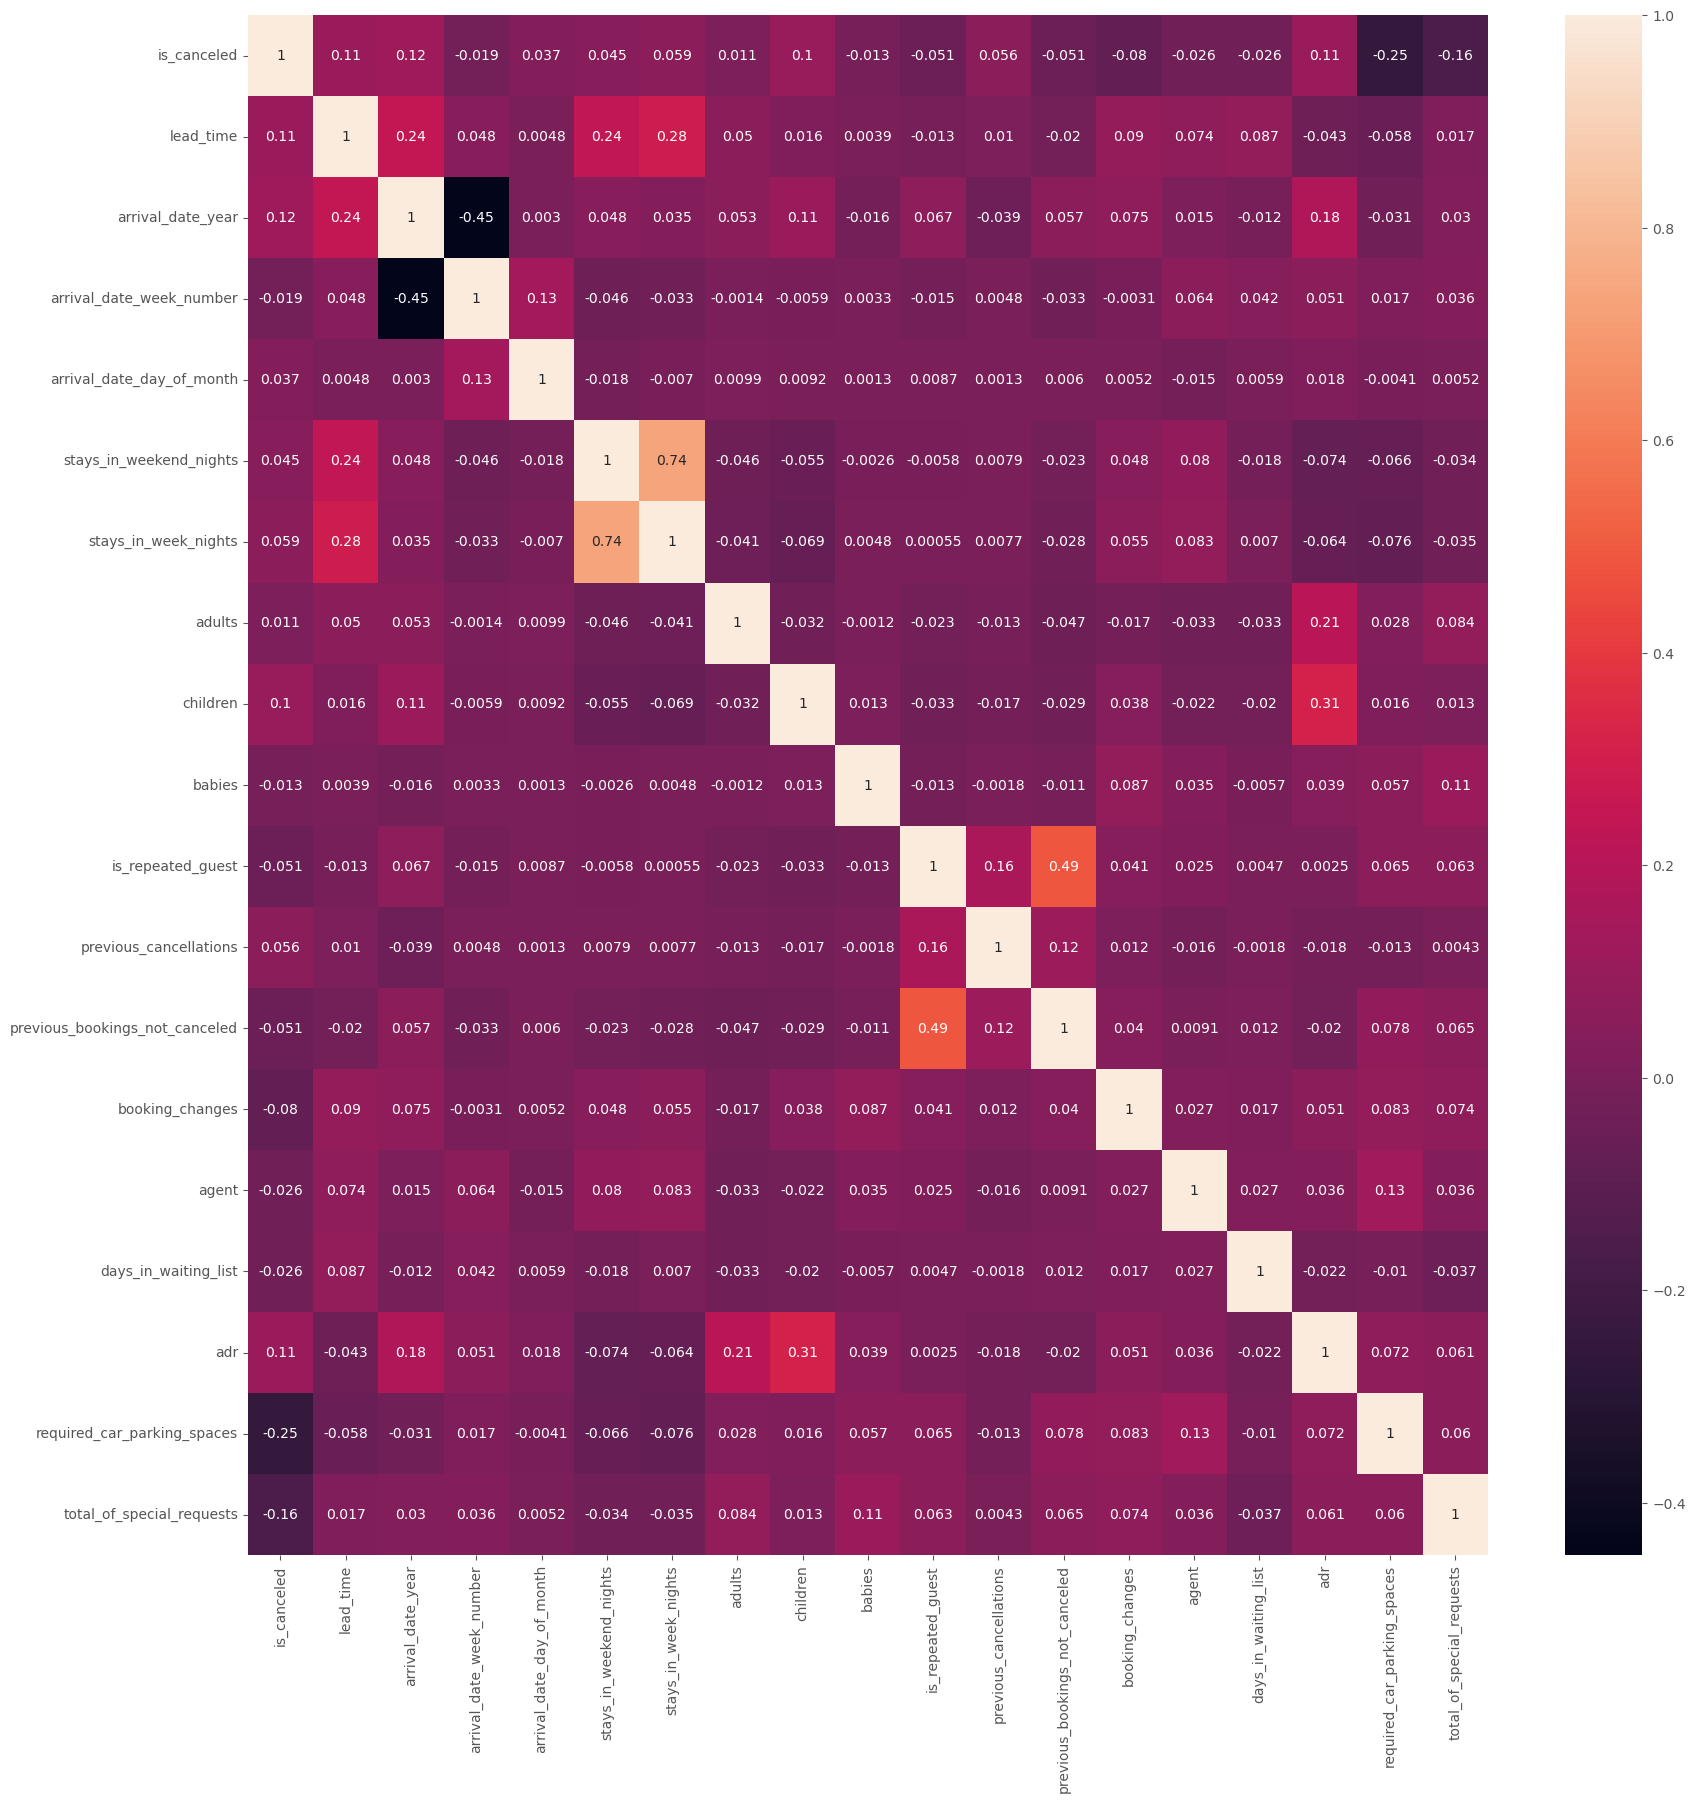

In [112]:
#check for data correlations
plt.figure(figsize=(20,20))
hb_corr = results_df.corr(method='pearson')
sns.heatmap(hb_corr, annot = True)

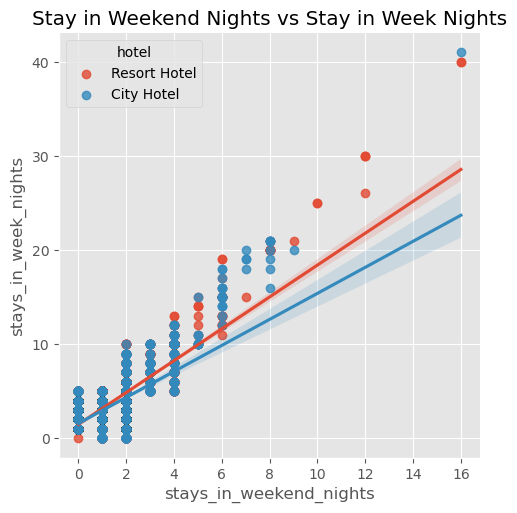

In [114]:
sns.lmplot(data=results_df, x='stays_in_weekend_nights',y='stays_in_week_nights', hue='hotel',legend_out=False)
plt.title('Stay in Weekend Nights vs Stay in Week Nights')
plt.show()

## `Question ponder about the data` 

* What year has a highest stays in weekend nights?
* What year has a highest stays in week nights?
* What hotel has a highest Number of special requests?
* What hotel has a highest booking cancellation?

Text(0.5, 0, 'stays_in_weekend_nights')

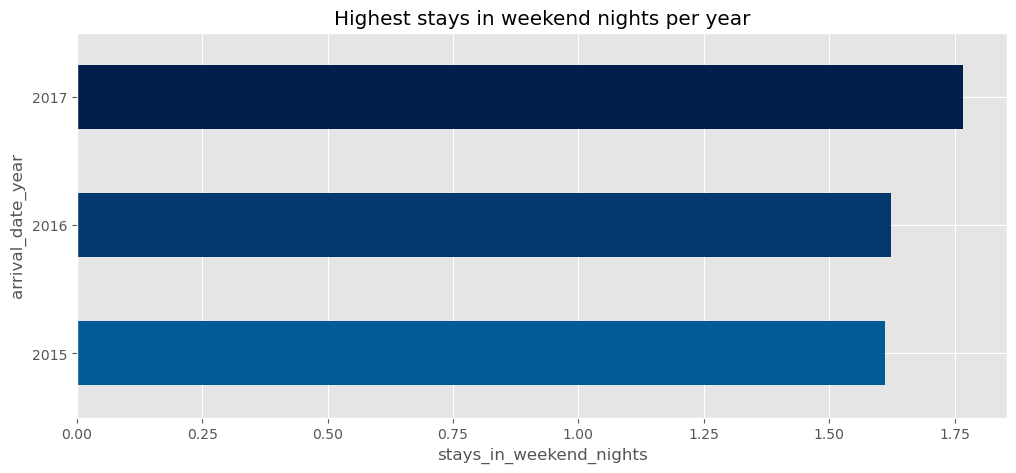

In [123]:
axis = results_df.query('arrival_date_year != "Other"').groupby('arrival_date_year')['stays_in_weekend_nights'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Highest stays in weekend nights per year',
                                        color = ['#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('stays_in_weekend_nights')

Text(0.5, 0, 'stays_in_week_nights')

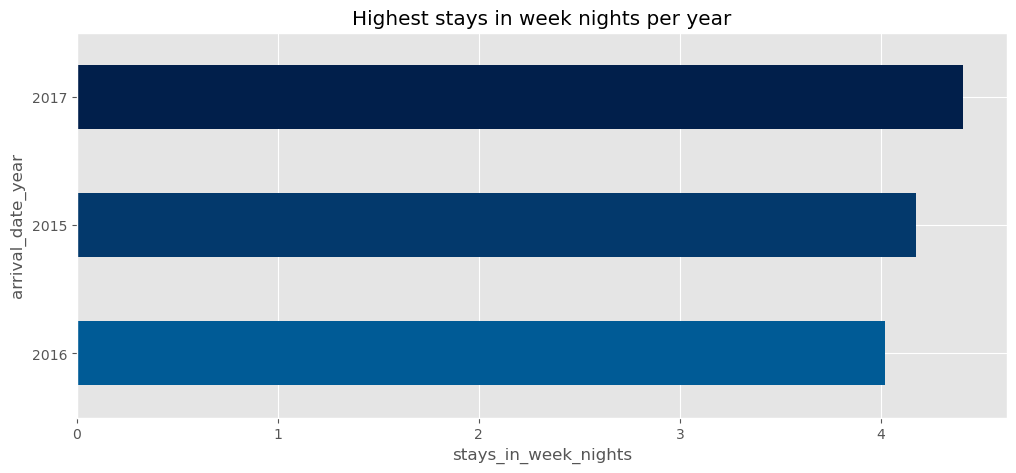

In [124]:
axis = results_df.query('arrival_date_year != "Other"').groupby('arrival_date_year')['stays_in_week_nights'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Highest stays in week nights per year',
                                        color = ['#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('stays_in_week_nights')

Text(0.5, 0, 'highest special requests')

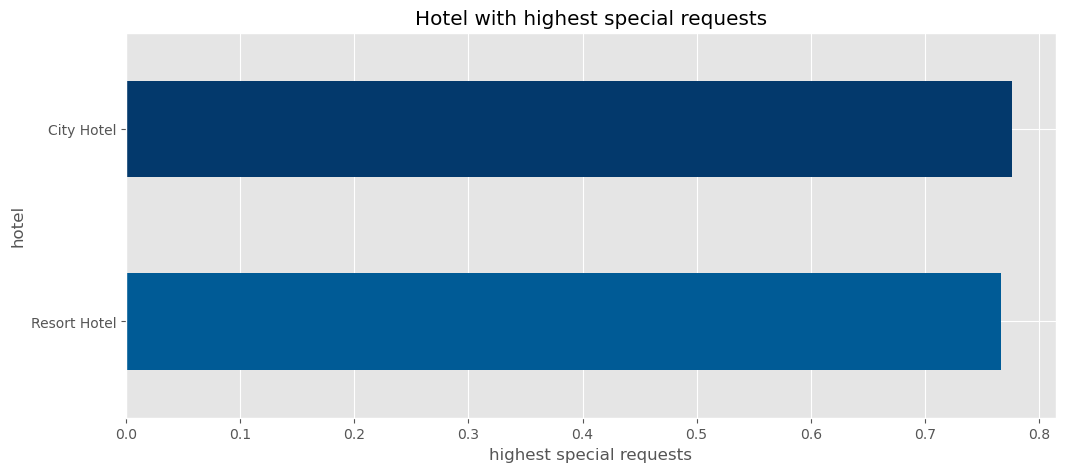

In [125]:
axis = results_df.query('hotel != "Other"').groupby('hotel')['total_of_special_requests'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Hotel with highest special requests',
                                        color = ['#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('highest special requests')

Text(0.5, 0, 'highest booking cancellation')

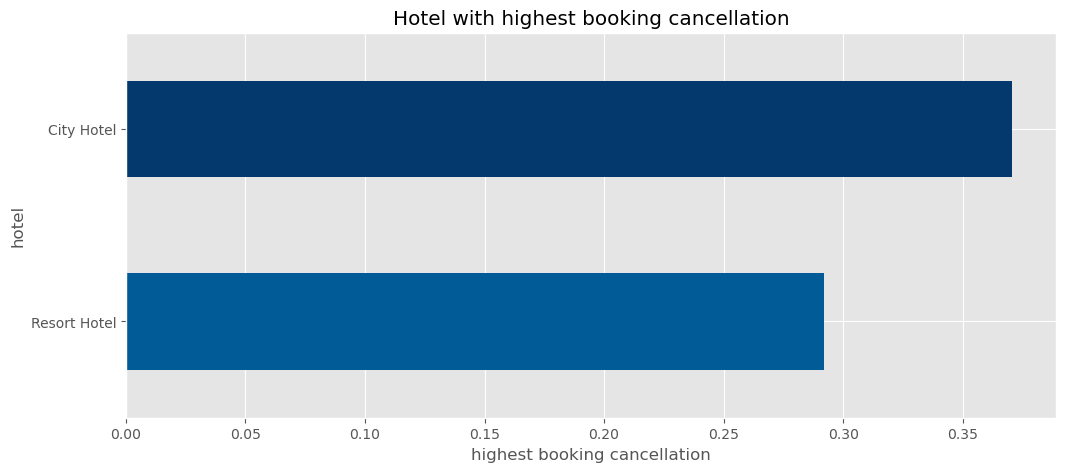

In [126]:
axis = results_df.query('hotel != "Other"').groupby('hotel')['is_canceled'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Hotel with highest booking cancellation',
                                        color = ['#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('highest booking cancellation')